---
# Setup

## Modules

In [1]:
import os
import pandas as pd
import copy
from Bio import Phylo, AlignIO
from functions import *
import subprocess
import matplotlib.pyplot as plt
from matplotlib import colors, lines
import seaborn as sns

## Paths

In [2]:
WILDCARDS = ["all", "chromosome", "full", "5"]
#project_dir = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/denmark/"
project_dir = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/"
results_dir = project_dir

READS_ORIGIN = WILDCARDS[0]
LOCUS_NAME = WILDCARDS[1]
PRUNE = WILDCARDS[2]
MISSING_DATA = WILDCARDS[3]

In [3]:
metadata_path       = project_dir + "/iqtree_stats/{}/{}/{}/filter{}/metadata.tsv".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA)
tree_path           = project_dir + "/beast/{}/{}/{}/filter{}/relaxed_clock/dates/run/beast_mcc.nex".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA)
auspice_config_path = results_dir + "config/auspice_config.json"
ml_colors_path = project_dir + "/augur/{}/{}/{}/filter{}/ml/colors.tsv".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA)
ml_latlon_path = project_dir + "/augur/{}/{}/{}/filter{}/ml/latlon.tsv".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA)


# ------------------------------------------
# Alignment
constant_sites_path = project_dir + "/snippy_multi/all/chromosome/full/snippy-multi.constant_sites.txt"
aln_path            = project_dir + "/beast/{}/{}/{}/filter{}/beast.fasta".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA)

# ------------------------------------------
# Output
auspice_dir         = os.path.join(results_dir, "auspice/{}/{}/{}/filter{}/beast/".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA))
if not os.path.exists(auspice_dir):
    subprocess.run(["mkdir", "-p", auspice_dir]) 
    
augur_dir           = os.path.join(results_dir, "augur/{}/{}/{}/filter{}/beast/".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA))
if not os.path.exists(augur_dir):
    subprocess.run(["mkdir", "-p", augur_dir]) 

## Variables

In [4]:
NO_DATA_CHAR = "NA"
JSON_INDENT = 2

# ------------------------------------------
# Alignment
with open(constant_sites_path) as infile:
    data = infile.read().strip().split(",")
    constant_sites = sum([int(count) for count in data])

aln = AlignIO.read(aln_path, "fasta")
variant_sites = len(aln[0].seq)
SEQ_LEN = constant_sites + variant_sites

# ------------------------------------------
# Plotting
plt.rcParams['axes.facecolor']    ='white'
plt.rcParams['savefig.facecolor'] ='white'
plt.rcParams['savefig.dpi']       = 400
plt.rcParams['svg.fonttype']      = 'none'

4244822


## Metadata

In [5]:
metadata_df = pd.read_csv(metadata_path, sep='\t')
metadata_df.set_index(metadata_df.columns[0], inplace=True)
metadata_df.fillna(NO_DATA_CHAR, inplace=True)

display(metadata_df)

,strain,date,date_bp,country,province,country_lat,country_lon,province_lat,province_lon,biovar,...,homo_het_sites,homo_sites,het_sites,het_ratio,external_branch_length,population_color,population,geometry,root_rtt_dist,population_rtt_dist
sample,,,,,,,,,,,,,,,,,,,,,
Reference,CO92,1992,-29,United States of America,Colorado,39.783730,-100.445882,38.7252,-105.608,Orientalis,...,NA,NA,NA,NA,3.990000e-06,#ff0000,1.ORI,POINT (-105.607716 38.7251776),0.000072,0.000006
GCA_009909635.1_ASM990963v1_genomic,9_10,1923.0,-98,Russia,Rostov Oblast,64.686314,97.745306,47.6222,40.7958,Medievalis,...,242,216,26,0.107438,2.112300e-06,#c5e88a,2.MED,POINT (40.7957942 47.6222451),0.000072,0.000008
GCA_009669545.1_ASM966954v1_genomic,42126,2006.0,-15,China,Xinjiang,35.000074,104.999927,42.4805,85.4633,Antiqua,...,271,246,25,0.0922509,0.000000e+00,#238af5,0.ANT,POINT (85.46334640000001 42.4804953),0.000054,0.000012
GCA_009669555.1_ASM966955v1_genomic,42123,2005.0,-16,China,Xinjiang,35.000074,104.999927,42.4805,85.4633,Antiqua,...,258,241,17,0.0658915,2.347000e-07,#238af5,0.ANT,POINT (85.46334640000001 42.4804953),0.000054,0.000012
GCA_009669565.1_ASM966956v1_genomic,42118,2005.0,-16,China,Xinjiang,35.000074,104.999927,42.4805,85.4633,Antiqua,...,265,247,18,0.0679245,4.694000e-07,#238af5,0.ANT,POINT (85.46334640000001 42.4804953),0.000055,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMEA7313243_45,Azov38,[1400:1700],[-621:-321],Russia,Rostov Oblast,64.686314,97.745306,47.6222,40.7958,Second Pandemic,...,120,96,24,0.2,9.388000e-07,#f3c16a,1.PRE,POINT (40.7957942 47.6222451),0.000073,0.000021
SAMEA7313246_49,Gdansk8,[1400:1700],[-621:-321],Poland,Pomeranian Voivodeship,52.018991,19.195586,54.2456,18.1099,Second Pandemic,...,260,171,89,0.342308,2.347000e-07,#f3c16a,1.PRE,POINT (18.1099 54.24556),0.000059,0.000007
SAMEA6651390,AGU010,[1435:1477],[-586:-544],Lithuania,Vilnius County,55.350000,23.750000,54.8227,25.2495,Second Pandemic,...,218,138,80,0.366972,2.350000e-08,#f3c16a,1.PRE,POINT (25.24953400167952 54.82269205),0.000059,0.000007


# Colors

In [6]:
out_path_colors = ml_colors_path.replace("/ml/", "/beast/")

with open(ml_colors_path, "r") as infile:
    with open(out_path_colors, "w") as outfile:
        outfile.write(infile.read())
        
colors_dict = {}
colors_dict["population"] = {'0.PRE': '#8000ff', '0.PE': '#5148fc', '0.ANT': '#238af5', '0.ANT4': '#0cc1e8', '3.ANT': '#3ae8d7', '4.ANT': '#68fcc1', '2.ANT': '#97fca7', '2.MED': '#c5e88a', '1.PRE': '#f3c16a', '1.ANT': '#ff8a48', '1.IN': '#ff4824', '1.ORI': '#ff0000', 'NA': '#c4c4c4'}


## Phylogeny

### Import Beast MCC Tree

Rename: GCA_003122795.1_Y.pestis_I_2422_genomic GCA_003122795.1_Y.pestis_I-2422_genomic
Rename: GCA_002412245.1_Y.pestis_A_1691_genomic GCA_002412245.1_Y.pestis_A-1691_genomic
Rename: GCA_002412225.1_Y.pestis_A_1486_genomic GCA_002412225.1_Y.pestis_A-1486_genomic
Rename: GCA_001617735.1_Yersinia_pestis_M_1763_genomic GCA_001617735.1_Yersinia_pestis_M-1763_genomic
Rename: GCA_001617785.1_Yersinia_pestis_M_549_genomic GCA_001617785.1_Yersinia_pestis_M-549_genomic
Rename: GCA_001617815.1_Yersinia_pestis_M_1453_genomic GCA_001617815.1_Yersinia_pestis_M-1453_genomic
Rename: GCA_001617705.1_Yersinia_pestis_C_791_genomic GCA_001617705.1_Yersinia_pestis_C-791_genomic


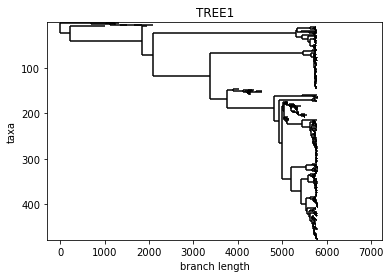

In [7]:
# Construct a dictionary to hold the trees
tree_dict = {}

# Add tree files to dict
tree_dict["tree_file_raw"] = tree_path 
tree_dict["tree_file_edit"] = os.path.splitext(tree_path)[0] + "_edit.nex"
tree_dict["sample_rename"] = {}


# Read in raw tree to deal with dashes
with open(tree_dict["tree_file_raw"],  "r") as infile:                    
    with open(tree_dict["tree_file_edit"], "w") as outfile:           
        raw_tree = infile.read()
        # Remove quotations if they exist
        raw_tree = raw_tree.replace("'","")

        # Split into lines to iterate over
        raw_tree_lines = raw_tree.split("\n")

        # By default don't parse a line for dashes
        taxa_line = False

        for line in raw_tree_lines: 

            if "TREE" not in line and "-" in line:

                if len(line.split(" ")) == 1:
                    name_dashes = line.strip()
                    name_no_dashes = name_dashes.replace("-","_")
                    tree_dict["sample_rename"][name_no_dashes] = name_dashes
                line = line.replace("-","_")

            outfile.write(line + "\n")

#print(tree_dict)

# Read in edited tree
trees = Phylo.parse(tree_dict["tree_file_edit"], "nexus")
# There should be only 1 tree
for t in trees:
    tree_dict["tree"] = t
    tree_dict["tree"].ladderize(reverse=False)
    break

# Rename sample names back to with dashes
for c in tree_dict["tree"].find_clades():
    if c.name in tree_dict["sample_rename"]:
        orig_name = c.name
        c.name = tree_dict["sample_rename"][c.name]
        print("Rename:", orig_name, c.name)

    # Strip the date suffix
    #if c.name:
    #    c.name = "_".join(c.name.split("_")[0:-1])           

# Rename internal nodes
node_i = 0
for c in tree_dict["tree"].find_clades():
    if not c.name:
        c.name = "NODE{}".format(node_i)
        node_i += 1

Phylo.draw(tree_dict["tree"], label_func = lambda x: '')

# Most Recent Sampling Date (MRSD)

In [8]:
mrsd = max(metadata_df["date_mean"])

### Add Tree Metadata to Dataframe

In [9]:
tree = tree_dict["tree"]

parameters = [
    "branch_length",
    "branch_length_sub",
    "node_type",    
    "branch_support",
    "branch_support_conf_category",
    "branch_support_conf_char",
    # Custom
    "country_date_strain",
    "province_date_strain",
    # Rate
    "rate",
    "rate_hpd",
    "rate_sub",
    "rate_sub_year",
    # Geo
    "continuous_geo",
    "continuous_geo_coord",    
    "continuous_geo_lat", 
    "continuous_geo_lon",    
    # Dates
    "height",
    "height_hpd",
    "timetree_num_date",
    "timetree_num_date_confidence",
]

# Add to dataframe
for param in parameters:
    metadata_df[param] = [NO_DATA_CHAR] * len(metadata_df)

# Dummy naming of locations geo
locations_geo_dict = {}
locations_geo_i = 1
    
for c in tree.find_clades():
    # Defaults
    node_type = "internal"
    branch_support = 0
    branch_support_conf_category = "LOW"
    branch_support_conf_char = ""
    branch_length = 0
    branch_length_sub = 0
    branch_length_time = tree.common_ancestor(c.name).branch_length
    country_date_strain = NO_DATA_CHAR
    province_date_strain = NO_DATA_CHAR
    rate_hpd = [0,0]
    rate = 0
    rate_sub_year = 0
    timetree_num_date = 0
    timetree_num_date_confidence = [0,0]
    height = 0
    height_hpd = [0,0]    
    locations_geo_coord = [NO_DATA_CHAR, NO_DATA_CHAR]
    locations_geo_name = NO_DATA_CHAR
    
    comment_dict = parse_comment(c.comment)


    # Branch Length
    if c.branch_length:
        branch_length = c.branch_length

    # Branch support
    if "posterior" in comment_dict:
        branch_support = float(round(float(comment_dict["posterior"]) * 100))
        if branch_support >= 95:
            branch_support_conf_category = "HIGH"
            branch_support_conf_char = "*"

    # Rates
    if "rate" in comment_dict:
        rate = float(comment_dict["rate"])
        rate_sub = rate

        if c.branch_length:
            rate_sub_year = rate * SEQ_LEN
            branch_length_sub = rate_sub_year * c.branch_length

    if "rate_95%_HPD" in comment_dict:
        rate_hpd_split = comment_dict["rate_95%_HPD"].strip("{}").split(",")
        rate_hpd = [float(r) for r in rate_hpd_split]   
        
    # Dates        
    if "height" in comment_dict:
        height = float(comment_dict["height"])

    if "height_95%_HPD" in comment_dict:
        height_hpd_split = comment_dict["height_95%_HPD"].strip("{}").split(",")
        height_hpd = [float(h) for h in height_hpd_split]

    height_hpd_reverse = copy.copy(height_hpd)
    height_hpd_reverse.reverse()
    timetree_num_date = float(round(mrsd - height))
    timetree_num_date_confidence = [round(mrsd - h) for h in height_hpd_reverse]  
        
    
    # Geo
    if "locationsgeo" in comment_dict:
        locations_geo_coord_split = comment_dict["locationsgeo"].strip("{}").split(",")
        locations_geo_coord = [float(l) for l in locations_geo_coord_split]
        
        if locations_geo_coord not in locations_geo_dict.values():
            locations_geo_name = "loc{}".format(locations_geo_i)
            locations_geo_dict[locations_geo_name] = locations_geo_coord
            locations_geo_i += 1
        else:
            for name, coord in locations_geo_dict.items():
                if coord == locations_geo_coord:
                    locations_geo_name = name
        
        
    if c.is_terminal():
        node_type = "terminal"
        country = metadata_df["country"][c.name]
        province = metadata_df["province"][c.name]
        date = metadata_df["date"][c.name]
        strain = metadata_df["strain"][c.name]

        country_date_strain = "{} {} {}".format(country, date, strain)
        province_date_strain = "{} {} {}".format(province, date, strain)
    
    # Add
    metadata_df.at[c.name, "branch_length"] = branch_length
    metadata_df.at[c.name, "branch_length_sub"] = branch_length_sub
    metadata_df.at[c.name, "branch_length_time"] = branch_length_time
    metadata_df.at[c.name, "node_type"] = node_type
    metadata_df.at[c.name, "branch_support"] = branch_support
    metadata_df.at[c.name, "branch_support_conf_category"] = branch_support_conf_category
    metadata_df.at[c.name, "branch_support_conf_char"] = branch_support_conf_char
    metadata_df.at[c.name, "country_date_strain"] = country_date_strain
    metadata_df.at[c.name, "province_date_strain"] = province_date_strain


    metadata_df.at[c.name, "rate"] = rate
    metadata_df.at[c.name, "rate_hpd"] = rate_hpd
    metadata_df.at[c.name, "rate_sub"] = rate_sub
    metadata_df.at[c.name, "rate_sub_year"] = rate_sub_year
    
    metadata_df.at[c.name, "height"] = height
    metadata_df.at[c.name, "height_hpd"] = height_hpd      


    metadata_df.at[c.name, "timetree_num_date"] = timetree_num_date
    metadata_df.at[c.name, "timetree_num_date_confidence"] = timetree_num_date_confidence   
    
    metadata_df.at[c.name, "continuous_geo_coord"] = locations_geo_coord
    metadata_df.at[c.name, "continuous_geo"] = locations_geo_name
    metadata_df.at[c.name, "continuous_geo_lat"] = locations_geo_coord[0]
    metadata_df.at[c.name, "continuous_geo_lon"] = locations_geo_coord[1]
 
  
    
    
# Update internal nodes NA
metadata_df.fillna(NO_DATA_CHAR, inplace=True)
display(metadata_df)

,strain,date,date_bp,country,province,country_lat,country_lon,province_lat,province_lon,biovar,...,rate_sub_year,continuous_geo,continuous_geo_coord,continuous_geo_lat,continuous_geo_lon,height,height_hpd,timetree_num_date,timetree_num_date_confidence,branch_length_time
sample,,,,,,,,,,,,,,,,,,,,,
Reference,CO92,1992,-29,United States of America,Colorado,39.7837,-100.446,38.7252,-105.608,Orientalis,...,1.203222,NA,"[NA, NA]",NA,NA,27.037840,"[26.99999999999727, 27.00000000000273]",1992.0,"[1992, 1992]",15.686206
GCA_009909635.1_ASM990963v1_genomic,9_10,1923.0,-98,Russia,Rostov Oblast,64.6863,97.7453,47.6222,40.7958,Medievalis,...,0.362727,NA,"[NA, NA]",NA,NA,96.037840,"[95.99999999999818, 96.00000000000182]",1923.0,"[1923, 1923]",35.637462
GCA_009669545.1_ASM966954v1_genomic,42126,2006.0,-15,China,Xinjiang,35.0001,105,42.4805,85.4633,Antiqua,...,0.071271,NA,"[NA, NA]",NA,NA,13.037840,"[12.999999999998181, 13.000000000002728]",2006.0,"[2006, 2006]",37.717840
GCA_009669555.1_ASM966955v1_genomic,42123,2005.0,-16,China,Xinjiang,35.0001,105,42.4805,85.4633,Antiqua,...,0.137995,NA,"[NA, NA]",NA,NA,14.037840,"[13.999999999998181, 14.000000000002728]",2005.0,"[2005, 2005]",31.420372
GCA_009669565.1_ASM966956v1_genomic,42118,2005.0,-16,China,Xinjiang,35.0001,105,42.4805,85.4633,Antiqua,...,0.197067,NA,"[NA, NA]",NA,NA,14.037840,"[13.999999999998181, 14.000000000002728]",2005.0,"[2005, 2005]",36.513496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NODE471,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0.348965,NA,"[NA, NA]",NA,NA,35.645600,"[27.44878806863926, 44.75988416605014]",1983.0,"[1974, 1992]",11.064134
NODE472,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0.403407,NA,"[NA, NA]",NA,NA,29.331207,"[23.598206745554307, 36.06945052625724]",1990.0,"[1983, 1995]",6.314393
NODE473,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0.086807,NA,"[NA, NA]",NA,NA,26.153456,"[14.495155764563606, 37.87970003639384]",1993.0,"[1981, 2005]",6.491901


## Adjust Dates (for aDNA?)

In [10]:
# Find the sample that had a fixed date
"""fixed_date_sample = "SAMN00715800"
fixed_date = 672
estimate_date = metadata_df.loc[fixed_date_sample]["height"]
date_conversion = fixed_date - estimate_date
print(date_conversion)"""

"""
# Convert heights to calendar dates
for rec in metadata_df.iterrows():
    sample = rec[0]
    height = rec[1]["height"]
    height_hpd = rec[1]["height_hpd"]
    height_hpd_reverse = copy.copy(height_hpd)
    height_hpd_reverse.reverse()
    
    timetree_num_date = round(mrsd - height - date_conversion)
    timetree_num_date_confidence = [round(mrsd - h - date_conversion) for h in height_hpd_reverse]

    metadata_df.at[sample, "timetree_num_date"] = timetree_num_date
    metadata_df.at[sample, "timetree_num_date_confidence"] = timetree_num_date_confidence
    
display(metadata_df)"""

'\n# Convert heights to calendar dates\nfor rec in metadata_df.iterrows():\n    sample = rec[0]\n    height = rec[1]["height"]\n    height_hpd = rec[1]["height_hpd"]\n    height_hpd_reverse = copy.copy(height_hpd)\n    height_hpd_reverse.reverse()\n    \n    timetree_num_date = round(mrsd - height - date_conversion)\n    timetree_num_date_confidence = [round(mrsd - h - date_conversion) for h in height_hpd_reverse]\n\n    metadata_df.at[sample, "timetree_num_date"] = timetree_num_date\n    metadata_df.at[sample, "timetree_num_date_confidence"] = timetree_num_date_confidence\n    \ndisplay(metadata_df)'

## Geo

In [11]:
out_path_latlon = ml_latlon_path.replace("/ml/", "/beast/")

with open(ml_latlon_path, "r") as infile:
    with open(out_path_latlon, "w") as outfile:
        outfile.write(infile.read())

# Continuous
with open(out_path_latlon, "a") as outfile:
    for name, coord in locations_geo_dict.items():
        lat = str(coord[0])
        lon = str(coord[1])
        outfile.write("continuous_geo" + "\t" + name + "\t" + lat + "\t" + lon + "\n")

## Rates

In [12]:
ci_1_std = np.array(
        np.percentile(
            np.array(list(metadata_df["rate_sub_year"])),
            (0, 68),
            axis=0,
        )
    )
ci_2_std = np.array(
        np.percentile(
            np.array(list(metadata_df["rate_sub_year"])),
            (0, 95),
            axis=0,
        )
    )

rate_thresholds = [0, ci_1_std[1], ci_2_std[1]]
rate_categories = ["LOW", "MED", "HIGH"]
rate_colors = ["#949494", "#1f77b4", "#d62728"]

for sample in metadata_df.index:
    rate = metadata_df["rate_sub_year"][sample]    
    for thresh, cat in zip(rate_thresholds, rate_categories):
        if rate > thresh:
            rate_cat = cat
    metadata_df.at[sample, "rate_sub_year_category"] = rate_cat


with open(out_path_colors, "a") as outfile:
    for cat, col in zip(rate_categories, rate_colors):
        line = "{}\t{}\t{}".format("rate_sub_year_category", cat, col)
        print(line)
        outfile.write(line + "\n")

rate_sub_year_category	LOW	#949494
rate_sub_year_category	MED	#1f77b4
rate_sub_year_category	HIGH	#d62728


---
# Plot

<AxesSubplot:xlabel='timetree_num_date', ylabel='rate_sub_year'>

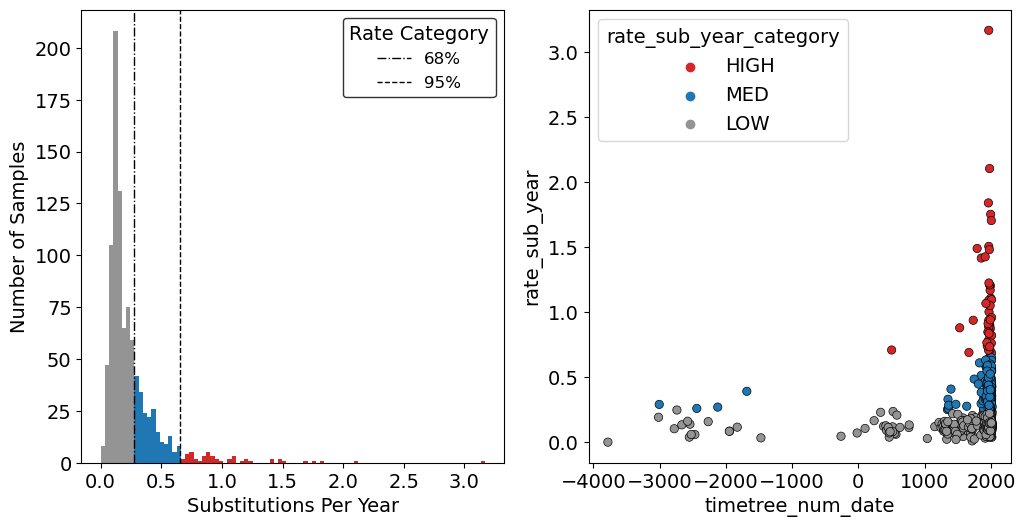

In [15]:
# ---------------------------------------
# PLOT SETUP
FONTSIZE=14
plt.rc('font', size=FONTSIZE)
DPI=100
FIGSIZE=[12,6]

fig, axes = plt.subplots(1, 2, figsize=FIGSIZE, dpi=DPI)

ax = axes[0]

sns.histplot(
    ax=ax,
    data=metadata_df,
    x="rate_sub_year",
    zorder=1,  
    ec="black",
    lw=0,
    color=rate_colors[0],
    alpha=1
)

for patch in ax.patches:
    rate = patch.get_x()
    for thresh, col in zip(rate_thresholds, rate_colors):    
        if rate > thresh:
            patch.set_facecolor(col)

ax.set_xlabel("Substitutions Per Year")
ax.set_ylabel("Number of Samples")

x_buff = 0.03
ax.axvline(ci_1_std[1] + x_buff, ls="dashdot", color="black", lw=1, label="68%")
ax.axvline(ci_2_std[1], ls="--", color="black", lw=1, label="95%")

ax.legend(loc=1, edgecolor="black", fontsize=FONTSIZE - 2, title="Rate Category", title_fontsize=FONTSIZE)


palette = copy.copy(rate_colors)
palette.reverse()

# ---- 
# Time
ax = axes[1]
sns.scatterplot(
    ax=ax,
    data=metadata_df,
    x="timetree_num_date",
    y="rate_sub_year",  
    ec="black",
    #s=10,
    hue="rate_sub_year_category",
    palette=palette,
    lw=0,
)

---

# ?. Export

## Metadata

In [16]:
out_path_metadata = os.path.join(augur_dir, "metadata.tsv")
print(out_path_metadata)
metadata_df.to_csv(out_path_metadata, sep="\t", index=True)

/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/augur/all/chromosome/full/filter5/beast/metadata.tsv


## Timetree

In [17]:
out_tree = copy.deepcopy(tree)

metadata_to_comment(out_tree, metadata_df)    
out_path_tree_nex = os.path.join(augur_dir, "all.timetree.nex")
Phylo.write(out_tree, out_path_tree_nex, "nexus")

for c in out_tree.find_clades():
    c.comment = None

out_tree_nwk_path = os.path.join(augur_dir, "all.timetree.nwk")
Phylo.write(out_tree, out_tree_nwk_path, "newick")

1

## Create Sub Dataframe

In [18]:
# Remember, order atters when dealing with confidence!

columns = [
    # Draw Divergence Tree / Required
    "branch_length",
    "branch_length_sub",
    
    # Time Tree    
    "branch_length_time",
    "date_mean",
    "date_err",
    "date_bp_mean",       
    "timetree_num_date",
    "timetree_num_date_confidence",
    
    # Branch Support
    "branch_support",
    "branch_support_conf_category",  
    "branch_support_conf_char",  
    
    # Geo
    "continuous_geo",
    "continent",
    "province",
    "country",
    "province_lat",
    "province_lon",
    "country_lat",
    "country_lon",
    # Other geo are part of mugration later
    
    # Colors and Filters   
    "branch_minor",
    "node_type",
    "branch_number",
    "host_human",    
    "host_order",
    "population",
    
    # Text Description
    "biosample_accession",
    "strain",
    "country_date_strain",
    "province_date_strain",
    
    # Stats    
    "root_rtt_dist",
    "population_rtt_dist",    
    #"root_geo_dist",
    #"population_geo_dist",
    "rate_sub",
    "rate_sub_year", 
    "rate_sub_year_category",
    "tstv",
    "ns_ss_ratio",
    "other_var_ratio",    
]

# Edit df
auspice_df = copy.deepcopy(metadata_df[columns])
auspice_df["node_name"] = list(auspice_df.index)
auspice_df["blank"] = [" "] * len(auspice_df)

for attr in MUG_ATTRIBUTE_LIST:
    auspice_df.rename(columns={attr: attr + "_raw"}, inplace=True)     

display(auspice_df)

,branch_length,branch_length_sub,branch_length_time,date_mean,date_err,date_bp_mean,timetree_num_date,timetree_num_date_confidence,branch_support,branch_support_conf_category,...,root_rtt_dist,population_rtt_dist,rate_sub,rate_sub_year,rate_sub_year_category,tstv,ns_ss_ratio,other_var_ratio,node_name,blank
sample,,,,,,,,,,,,,,,,,,,,,
Reference,15.686206,18.873994,15.686206,1992,0,29,1992.0,"[1992, 1992]",0.0,LOW,...,7.15499e-05,5.9146e-06,2.834565e-07,1.203222,HIGH,NA,NA,NA,Reference,
GCA_009909635.1_ASM990963v1_genomic,35.637462,12.926670,35.637462,1923,0,98,1923.0,"[1923, 1923]",0.0,LOW,...,7.20581e-05,8.4492e-06,8.545164e-08,0.362727,MED,1.854,2.37255,0.0196078,GCA_009909635.1_ASM990963v1_genomic,
GCA_009669545.1_ASM966954v1_genomic,37.717840,2.688184,37.717840,2006,0,15,2006.0,"[2006, 2006]",0.0,LOW,...,5.41541e-05,1.19379e-05,1.679007e-08,0.071271,LOW,1.935,2.23333,0,GCA_009669545.1_ASM966954v1_genomic,
GCA_009669555.1_ASM966955v1_genomic,31.420372,4.335839,31.420372,2005,0,16,2005.0,"[2005, 2005]",0.0,LOW,...,5.44828e-05,1.22666e-05,3.250890e-08,0.137995,LOW,2.119,2.2931,0,GCA_009669555.1_ASM966955v1_genomic,
GCA_009669565.1_ASM966956v1_genomic,36.513496,7.195608,36.513496,2005,0,16,2005.0,"[2005, 2005]",0.0,LOW,...,5.46235e-05,1.24073e-05,4.642529e-08,0.197067,LOW,2,2.25,0,GCA_009669565.1_ASM966956v1_genomic,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NODE471,11.064134,3.860992,11.064134,NA,NA,NA,1983.0,"[1974, 1992]",100.0,HIGH,...,NA,NA,8.220950e-08,0.348965,MED,NA,NA,NA,NODE471,
NODE472,6.314393,2.547272,6.314393,NA,NA,NA,1990.0,"[1983, 1995]",100.0,HIGH,...,NA,NA,9.503516e-08,0.403407,MED,NA,NA,NA,NODE472,
NODE473,6.491901,0.563542,6.491901,NA,NA,NA,1993.0,"[1981, 2005]",70.0,LOW,...,NA,NA,2.045009e-08,0.086807,LOW,NA,NA,NA,NODE473,


## Augur JSON

In [19]:
#import sys, importlib
#importlib.reload(sys.modules['functions'])
#from functions import augur_export

augur_dict = augur_export(
    tree_path=None, 
    aln_path=None,  
    tree=tree, 
    tree_df=auspice_df, 
    color_keyword_exclude=["geometry"],
    type_convert = {
        "branch_number" : (lambda x : str(x))
    },
)

first_node = list(augur_dict["nodes"].keys())[0]

print(augur_dict["nodes"][first_node])

out_path_augur_json = os.path.join(augur_dir, "all.json" )
utils.write_json(data=augur_dict, file_name=out_path_augur_json, indent=JSON_INDENT)

{'branch_length': 0.0, 'branch_length_sub': 0.0, 'branch_length_time': 0.0, 'date_mean': 'NA', 'date_err': 'NA', 'date_bp_mean': 'NA', 'num_date': -3782.0, 'num_date_confidence': [-4982, -3000], 'branch_support': 100.0, 'branch_support_conf_category': 'HIGH', 'branch_support_conf_char': '*', 'continuous_geo': 'NA', 'continent_raw': 'NA', 'province_raw': 'NA', 'country_raw': 'NA', 'province_lat': 'NA', 'province_lon': 'NA', 'country_lat': 'NA', 'country_lon': 'NA', 'branch_minor': 'NA', 'node_type': 'internal', 'branch_number': 'NA', 'host_human': 'NA', 'host_order_raw': 'NA', 'population_raw': 'NA', 'biosample_accession': 'NA', 'strain': 'NA', 'country_date_strain': 'NA', 'province_date_strain': 'NA', 'root_rtt_dist': 'NA', 'population_rtt_dist': 'NA', 'rate_sub': 1.0, 'rate_sub_year': 0.0, 'rate_sub_year_category': 'LOW', 'tstv': 'NA', 'ns_ss_ratio': 'NA', 'other_var_ratio': 'NA', 'node_name': 'NODE0', 'blank': ' '}


## Auspice JSON

In [20]:
#import sys, importlib
#importlib.reload(sys.modules['functions'])
#from functions import auspice_export, branch_attributes

auspice_dict = auspice_export(
    tree=tree,
    augur_json_paths=[out_path_augur_json], 
    auspice_config_path=auspice_config_path, 
    auspice_colors_path=out_path_colors,
    auspice_latlons_path=out_path_latlon, 
    auspice_geo_res=["country", "province", "continuous_geo",]
    )


label_col = list(auspice_df.columns)

# Recursively add branch attrs
branch_attributes(
    tree_dict=auspice_dict["tree"], 
    sub_dict=auspice_dict["tree"], 
    df=auspice_df,
    label_col=label_col,
    )


# Last manual changes
auspice_dict_copy = copy.deepcopy(auspice_dict)
for i in range(0, len(auspice_dict_copy["meta"]["colorings"])):
    coloring = auspice_dict_copy["meta"]["colorings"][i]
    for key in coloring:
        # Node type as internal or terminal
        if coloring[key] == "node_type":
            auspice_dict["meta"]["colorings"][i]['scale'] = [['internal', '#FFFFFF'], ['terminal', '#000000']]
            #print(auspice_dict["meta"]["colorings"][i])
        # Confidence category
        if "conf_category" in coloring[key]:
            auspice_dict["meta"]["colorings"][i]['scale'] = [['LOW', '#FFFFFF'], ['HIGH', '#000000']]
            #print(auspice_dict["meta"]["colorings"][i])
        
# Write outputs - For Local Rendering
out_path_auspice_local_json = os.path.join(auspice_dir, "all.json" )
utils.write_json(data=auspice_dict, file_name=out_path_auspice_local_json, indent=JSON_INDENT, include_version=False)
export_v2.validate_data_json(out_path_auspice_local_json)
print("Validation successful for local JSON.\n")

#out_path_auspice_remote_json = os.path.join(auspice_dir, "{}_all.json".format(AUSPICE_PREFIX))
#utils.write_json(data=auspice_dict, file_name=out_path_auspice_local_json, indent=JSON_INDENT, include_version=False)
#export_v2.validate_data_json(out_path_auspice_local_json)
#print("Validation successful for local JSON.\n")

Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/config/auspice_config.json'...
Validation success.


Validating produced JSON
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/all.json'...
Validating that the JSON is internally consistent...
Validation of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/all.json' succeeded, but there were warnings you may want to resolve.
Validation successful for local JSON.



## Subtrees

In [23]:
#import sys, importlib
#importlib.reload(sys.modules['functions'])
#from functions import extract_subtree

population_list = ['0.PRE', '0.PE', '0.ANT', '0.ANT4', '4.ANT', '3.ANT', '1.PRE', '1.ANT', '1.IN', '1.ORI', '2.ANT', '2.MED']
timetree = tree

for population in population_list:
    timetree_copy = copy.deepcopy(timetree)
    
    # Create the subtree df
    df = metadata_df[metadata_df["population"] == population]
    color = df["population_color"][0]
    
    #if len(subtree_df) < 2: continue
    print(population, color)

    #df.sort_values("timetree_coord_y", inplace=True)
    tips = df[df["node_type"] == "terminal"]
    internals = df[df["node_type"] == "internal"]
    
    # ----------------------------------------------
    # Subtree Timetree
    subtree = extract_subtree(
        tree=timetree_copy, 
        tips=list(tips.index), 
        df=metadata_df, 
        color_branches=False)
    
    metadata_to_comment(subtree, metadata_df)   


    out_subtree_nex_path = os.path.join(augur_dir, "{}.timetree.nex".format(population))
    Phylo.write(subtree, out_subtree_nex_path, "nexus")
    out_subtree_nwk_path = os.path.join(augur_dir, "{}.timetree.nwk".format(population))
    Phylo.write(subtree, out_subtree_nwk_path, "newick")
    
    
    augur_dict = augur_export(
        tree_path=None, 
        aln_path=None,  
        tree=subtree, 
        tree_df=auspice_df, 
        color_keyword_exclude=["geometry"],
        type_convert = {
            "branch_number" : (lambda x : str(x))
        },
    ) 
        
    out_path_augur_json = os.path.join(augur_dir, "{}.json".format(population) )
    utils.write_json(data=augur_dict, file_name=out_path_augur_json, indent=JSON_INDENT)

    auspice_dict = auspice_export(
        tree=subtree,
        augur_json_paths=[out_path_augur_json], 
        auspice_config_path=auspice_config_path, 
        auspice_colors_path=out_path_colors,
        auspice_latlons_path=out_path_latlon, 
        )    
    
    label_col = list(auspice_df.columns)

    # Recursively add branch attrs
    branch_attributes(
        tree_dict=auspice_dict["tree"], 
        sub_dict=auspice_dict["tree"], 
        df=auspice_df,
        label_col=label_col,
        )    
    
    # Last manual changes
    auspice_dict_copy = copy.deepcopy(auspice_dict)
    for i in range(0, len(auspice_dict_copy["meta"]["colorings"])):
        coloring = auspice_dict_copy["meta"]["colorings"][i]
        for key in coloring:
            # Node type as internal or terminal
            if coloring[key] == "node_type":
                auspice_dict["meta"]["colorings"][i]['scale'] = [['internal', '#FFFFFF'], ['terminal', color]]
                #print(auspice_dict["meta"]["colorings"][i])
            # Confidence category
            if "conf_category" in coloring[key]:
                auspice_dict["meta"]["colorings"][i]['scale'] = [['LOW', '#FFFFFF'], ['HIGH', color]]
                #print(auspice_dict["meta"]["colorings"][i]) 
    
    # Write outputs - For Local Rendering
    out_path_auspice_local_json = os.path.join(auspice_dir, "{}.json".format(population) )
    utils.write_json(data=auspice_dict, file_name=out_path_auspice_local_json, indent=JSON_INDENT, include_version=False)
    export_v2.validate_data_json(out_path_auspice_local_json)
    print("Validation successful for local JSON.\n")

0.PRE #8000ff
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/config/auspice_config.json'...
Validation success.
Validating produced JSON
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/0.PRE.json'...
Validating that the JSON is internally consistent...
Validation of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/0.PRE.json' succeeded, but there were warnings you may want to resolve.
Validation successful for local JSON.



0.PE #5148fc
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/config/auspice_config.json'...
Validation success.


Validating produced JSON
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/0.PE.json'...
Validating that the JSON is internally consistent...
Validation of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/0.PE.json' succeeded, but there were warnings you may want to resolve.
Validation successful for local JSON.



0.ANT #238af5
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/config/auspice_config.json'...
Validation success.


Validating produced JSON
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/0.ANT.json'...
Validating that the JSON is internally consistent...
Validation of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/0.ANT.json' succeeded, but there were warnings you may want to resolve.
Validation successful for local JSON.

0.ANT4 #0cc1e8


Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/config/auspice_config.json'...
Validation success.
Validating produced JSON
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/0.ANT4.json'...
Validating that the JSON is internally consistent...
Validation of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/0.ANT4.json' succeeded, but there were warnings you may want to resolve.
Validation successful for local JSON.



4.ANT #68fcc1
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/config/auspice_config.json'...
Validation success.


Validating produced JSON
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/4.ANT.json'...
Validating that the JSON is internally consistent...
Validation of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/4.ANT.json' succeeded, but there were warnings you may want to resolve.
Validation successful for local JSON.

3.ANT #3ae8d7
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/config/auspice_config.json'...
Validation success.
Validating produced JSON
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/3.ANT.json'...
Validating that the JSON is internally consistent...
Validation of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/3.ANT.json' succeed

#f3c16a
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/config/auspice_config.json'...
Validation success.


Validating produced JSON
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/1.PRE.json'...
Validating that the JSON is internally consistent...
Validation of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/1.PRE.json' succeeded, but there were warnings you may want to resolve.
Validation successful for local JSON.

1.ANT #ff8a48


Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/config/auspice_config.json'...
Validation success.
Validating produced JSON
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/1.ANT.json'...
Validating that the JSON is internally consistent...
Validation of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/1.ANT.json' succeeded, but there were warnings you may want to resolve.
Validation successful for local JSON.

1.IN #ff4824


Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/config/auspice_config.json'...
Validation success.


Validating produced JSON
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/1.IN.json'...
Validating that the JSON is internally consistent...
Validation of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/1.IN.json' succeeded, but there were warnings you may want to resolve.
Validation successful for local JSON.

1.ORI #ff0000


Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/config/auspice_config.json'...
Validation success.


Validating produced JSON
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/1.ORI.json'...
Validating that the JSON is internally consistent...
Validation of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/1.ORI.json' succeeded, but there were warnings you may want to resolve.
Validation successful for local JSON.



2.ANT #97fca7
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/config/auspice_config.json'...
Validation success.


Validating produced JSON
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/2.ANT.json'...
Validating that the JSON is internally consistent...
Validation of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/2.ANT.json' succeeded, but there were warnings you may want to resolve.
Validation successful for local JSON.

2.MED #c5e88a


Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/config/auspice_config.json'...
Validation success.


Validating produced JSON
Validating schema of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/2.MED.json'...
Validating that the JSON is internally consistent...
Validation of '/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/auspice/all/chromosome/full/filter5/beast/2.MED.json' succeeded, but there were warnings you may want to resolve.
Validation successful for local JSON.

